<br>

# **앙상블 기법 (Ensemble)**  

조화 또는 통일을 의미한다.  
지금까지는 예측을 할 때 하나의 모델만 사용해왔다. 하지만 여러개의 모델을 조화롭게 학습시켜 모델 들의 예측 결과들을 종합한다면 더 정확한 예측을 할 수 있다. 이것이 앙상블 기법이다.  
여러 모델들의 예측결과 보팅을 통해 최종 결과를 도출해낸다.   

> 보팅(Voting) : 여러 개의 분류기가 투표를 통해 최종 예측 결과를 결정하는 방식

앙상블 학습방법에는 배깅과 부스팅이 있다.   







## 배깅 (Bagging)

Bootstrap Aggregation의 약자로 데이터로부터 부트스트랩(랜덤복원추출)을 진행하여 모델을 학습시키고, 모델의 결과를 집계(Aggregating)하여 최종결과를 구하는 방법이다. 부트스트랩이란 동일한 크기의 샘플을 계속 복원추출하는 것이다. (중복가능)   

종속변수가 범주형인 분류모델의 경우에는 투표방식(보팅)으로 결과를 카운팅하여 한 표라도 더 나온 범주가 최종결과로 선택된다.   종속변수가 연속형인 예측모델은 각 결과의 평균으로 집계한다. 각각의 모델이 예측한 결과의 평균을 구해 최종 예측결과를 도출하는 것이다.   

만약 분류모델에서 동일한 투표수를 얻는다면? 
→ 500개 이상 분류기를 사용하기 때문에 확률적으로 결과가 동일하게 나올 가능성이 매우 적다. 그럼에도 불구하고 동일한 투표수가 나온다면?  
→ 홀수로 부여하는 등 파라미터를 조정하여 해결한다.  

배깅은 간단하면서도 성능이 우수한 방법이다. 배깅 기법을 활용한 대표적인 모델이 랜덤포레스트이다.  





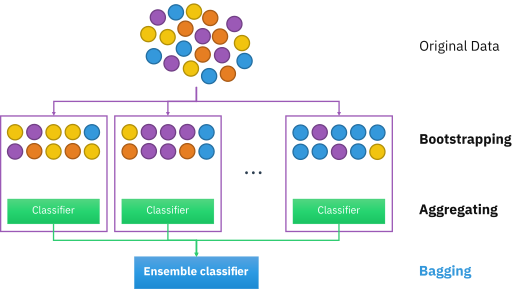




<br>

## 부스팅 (Boosting)  

부스팅은 가중치를 사용하여 분류기의 성능을 점점 높여가는 방법이다. 약한 분류기에서 강한 분류기로 성장시킨다.  

먼저 원본데이터에서 샘플링하여 학습을 한다. 물론 처음 결과는 좋지 않다. 만들어진 샘플의 일부에 가중치를 부여하여 새로운 샘플을 생성하고 새로운 샘플로 다시 학습하여 좀 더 나은 분류기를 만든다.  이러한 과정의 반복하다 보면 약했던 분류기는 성능이 향상되어 강한 분류기가 된다.  

모델은 순차적으로 학습되고 잘못 분류된 결과가 있더라도 가중치를 부여해 새로 학습하기 때문에 점점 성능이 향상된다.

가중치는 전 단계 모델의 예측결과에 따라 결정된다. 분류가 잘못된 데이터는 가중치를 높여주고, 분류가 잘 된 데이터는 가중치를 낮추어 부여한다. 잘못된 데이터의 경우 가중치를 부여함으로써 그 다음 단계의 모델에서 더 집중적으로 분류할 수 있게 된다.  

점점 모델의 성능이 점점 높아지면서 cost도 줄어들게 되고 그러다가 cost가 더 이상 줄어들지 않는 한계점에 도달할 수 있다.  

이러한 부스팅 방법의 모델로는 `AdaBoost`, `XGBooster`, `LGB`가 있다.


<br>

부스팅은 배깅에 비해 성능이 우수하다. 다만 배깅보다 속도가 느리고 과적합이 발생할 가능성이 크다.

정확도(성능)를 생각한다면 부스팅, 과적합이 우려된다면 배깅 사용하는 것이 좋다. 목적에 맞게 선택하도록 한다.  







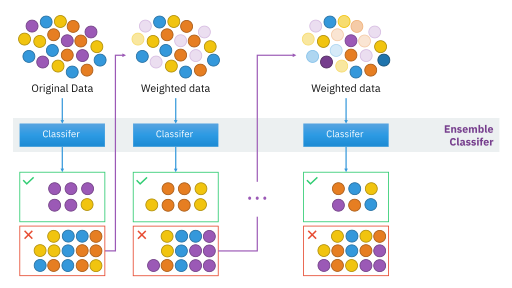

이미지출처 : https://data-matzip.tistory.com/entry/%EC%95%99%EC%83%81%EB%B8%94-%EA%B8%B0%EB%B2%95-%EC%A0%95%EB%A6%AC-1-%EC%95%99%EC%83%81%EB%B8%94Ensemble-%EA%B8%B0%EB%B2%95%EA%B3%BC-%EB%B0%B0%EA%B9%85Bagging-%EB%B6%80%EC%8A%A4%ED%8C%85Boosting-%EC%8A%A4%ED%85%8C%EC%9D%B4%ED%82%B9Stacking

<br>

# 🌲 **랜덤포레스트 Random Forest**  

앙상블 기법 중 하나로 Decision Tree 분류기 여러 개를 결합하여 사용하는 방법이다. (기본이 500개) 분류가 주요 영역이지만 예측도 가능하다. 배깅 방법을 사용한다.  

랜덤포레스트는 여러 개의 결정트리 분류기를 결합하여 사용한다.  각각의 모델이 학습을 수행한 뒤에 모든 분류기가 보팅을 하여 최종 결과를 도출한다.  

나이브 베이즈, SVM, 결정트리 등의 전통적인 머신러닝 방법들은 한풀 꺾였지만 랜덤포레스트는 아직까지도 자주 이용되는 방법 중 하나이다.  



<br>

# 랜덤포레스트 실습 - titanic dataset 



In [ ]:
import pandas as pd

df = pd.read_csv('/content/drive/MyDrive/testdata/titanic_data.csv')
print(df.head(3))
print(df.shape)

#결측치 처리
print(len(df.isnull().any()))
df = df.dropna(subset=['Pclass','Age','Sex'])
print(df.shape)

df_y = df['Survived']
print(df_y[:3])

df_x = df[['Pclass','Age','Sex']]
print(df_x.head(3)) 

   PassengerId  Survived  Pclass  ...     Fare Cabin  Embarked
0            1         0       3  ...   7.2500   NaN         S
1            2         1       1  ...  71.2833   C85         C
2            3         1       3  ...   7.9250   NaN         S

[3 rows x 12 columns]
(891, 12)
12
(714, 12)
0    0
1    1
2    1
Name: Survived, dtype: int64
   Pclass   Age     Sex
0       3  22.0    male
1       1  38.0  female
2       3  26.0  female


<br>

## 데이터 인코딩 - `LabelEncoder(), OneHotEncoder()`  

`LabelEncoder()` : 문자열로 되어있는 범주를 숫자로 범주화한다.  
일괄적인 숫자 값으로 변환되므로 예측 성능이 떨어질 수 있다.
-> 숫자의 크고 작음에 대한 특성이 작용하기 때문 
선형 회귀와 같은 알고리즘에는 적절하지 않다. 트리 계열의 알고리즘은 숫자의 특성을 반영하지 않으므로 사용가능하다.  



`OneHotEncoder()` : 더미변수로 변환한다.  


In [ ]:
#성별 컬럼 숫자형 범주로 변환
#apply 사용
df_x['Sex'] = df_x['Sex'].apply(lambda x:1 if x=='male' else 0)
print(df_x.head(3))

#LabelEncoder 사용
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
df_x.loc[:, 'Sex'] = LabelEncoder().fit_transform(df_x['Sex'])  #male:1, female:0
print(df_x.head(3))

   Pclass   Age  Sex
0       3  22.0    1
1       1  38.0    0
2       3  26.0    0
   Pclass   Age  Sex
0       3  22.0    1
1       1  38.0    0
2       3  26.0    0


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1743: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)


In [ ]:
#Pclass 컬럼 더미변수로 변환
print(df_x['Pclass'].unique())

import numpy as np
df_x2 = pd.DataFrame(OneHotEncoder().fit_transform(df_x['Pclass'].values[:, np.newaxis]).toarray(),
                     columns=['f_class','s_class','t_class'], index=df_x.index)
#print(df_x2)

df_x = pd.concat([df_x, df_x2], axis=1)
print(df_x)

[3 1 2]
     Pclass   Age  Sex  f_class  s_class  t_class
0         3  22.0    1      0.0      0.0      1.0
1         1  38.0    0      1.0      0.0      0.0
2         3  26.0    0      0.0      0.0      1.0
3         1  35.0    0      1.0      0.0      0.0
4         3  35.0    1      0.0      0.0      1.0
..      ...   ...  ...      ...      ...      ...
885       3  39.0    0      0.0      0.0      1.0
886       2  27.0    1      0.0      1.0      0.0
887       1  19.0    0      1.0      0.0      0.0
889       1  26.0    1      1.0      0.0      0.0
890       3  32.0    1      0.0      0.0      1.0

[714 rows x 6 columns]


<br>

## 데이터 분리하기  


In [ ]:
from sklearn.model_selection import train_test_split

train_x, test_x, train_y, test_y = train_test_split(df_x, df_y, test_size=0.25, random_state=12)
print(train_x.shape)
print(test_x.shape)

(535, 6)
(179, 6)


<br>

## 모델 작성 : `RandomForestClassifier()`

In [ ]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(criterion='entropy', n_estimators=100)
fit_model = model.fit(train_x, train_y)

예측값 [1 0 0 0 0 0 1 1 0 1]
실제값 [1 0 0 0 1 0 1 1 0 1]
acc1: 0.8268156424581006
acc2: 0.8268156424581006


<br>

## 모델 성능 확인 


In [ ]:
pred = fit_model.predict(test_x)
print('예측값', pred[:10])
print('실제값', test_y[:10].values)
print()

#분류정확도
print('acc1:', sum(test_y==pred)/len(test_y))

from sklearn.metrics import accuracy_score
print('acc2:', accuracy_score(test_y, pred))
print()

#교차검증
from sklearn.model_selection import cross_val_score
cross_val = cross_val_score(model, df_x, df_y, cv=5)
print(cross_val)
print(np.round(np.mean(cross_val), 3))

예측값 [1 0 0 0 0 0 1 1 0 1]
실제값 [1 0 0 0 1 0 1 1 0 1]

acc1: 0.8268156424581006
acc2: 0.8268156424581006

[0.76923077 0.8041958  0.83216783 0.82517483 0.82394366]
0.811


<br>

## 특성 중요도


특성(변수) 중요도 :
[0.05312981 0.5527596  0.30423701 0.03204067 0.01325582 0.0445771 ]


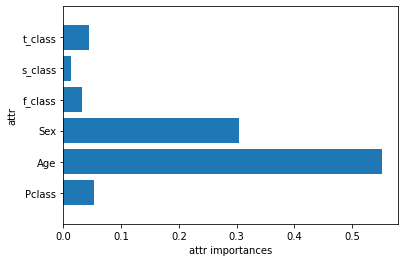

In [ ]:
print('특성(변수) 중요도 :\n{}'.format(model.feature_importances_))

import matplotlib.pyplot as plt
def plot_feature_importances(model):   # 특성 중요도 시각화
    n_features = df_x.shape[1]
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), df_x.columns)
    plt.xlabel("attr importances")
    plt.ylabel("attr")
    plt.ylim(-1, n_features)
    plt.show()
    plt.close()

plot_feature_importances(model)

<br>

# 랜덤포레스트 실습 - iris dataset 


In [ ]:
import pandas as pd
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

iris = datasets.load_iris()

x = iris.data[:, [2,3]]  #petal.length, petal.width
y = iris.target
print(x[:3])
print(y[:3], set(y))

#train, test
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0) 
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

[[1.4 0.2]
 [1.4 0.2]
 [1.3 0.2]]
[0 0 0] {0, 1, 2}
(105, 2) (45, 2) (105,) (45,)


<br>

## `RandomForestClassifier()`

In [ ]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(criterion='entropy', n_estimators=500, n_jobs=2, random_state=1) #n_jobs=n : cpu가 여러개 일 경우 
model.fit(x_train, y_train)

#분류 예측
y_pred = model.predict(x_test)
print('예측값:', y_pred)
print('실제값:', y_test)
print('총 개수: %d, 오류수: %d'%(len(y_test), (y_test != y_pred).sum()))
print()

print('분류정확도 확인:')
print('%.3f'%accuracy_score(y_test, y_pred))

print(x_test[:3])
new_data = np.array([[5.1, 2.4], [0.3, 0.3], [3.4, 0.2]])
new_pred = model.predict(new_data)
print('예측결과:', new_pred)

예측값: [2 1 0 2 0 2 0 1 1 1 2 1 1 1 1 0 1 1 0 0 2 1 0 0 2 0 0 1 1 0 2 1 0 2 2 1 0
 2 1 1 2 0 2 0 0]
실제값: [2 1 0 2 0 2 0 1 1 1 2 1 1 1 1 0 1 1 0 0 2 1 0 0 2 0 0 1 1 0 2 1 0 2 2 1 0
 1 1 1 2 0 2 0 0]
총 개수: 45, 오류수: 1

분류정확도 확인:
0.978
[[5.1 2.4]
 [4.  1. ]
 [1.4 0.2]]
예측결과: [2 0 0]


<br>

## 시각화 


In [ ]:
#그래프를 위한 글꼴설치
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 40 not upgraded.
Need to get 9,604 kB of archives.
After this operation, 29.5 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-nanum all 20170925-1 [9,604 kB]
Fetched 9,604 kB in 3s (3,381 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 160837 files and d

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


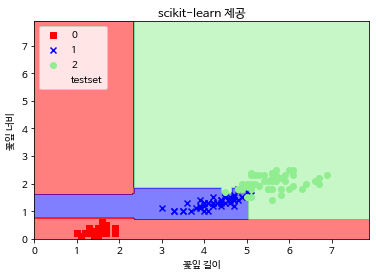

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

plt.rc('font', family='NanumBarunGothic')
plt.rcParams['axes.unicode_minus'] = False

def plot_decision_region(X, y, classifier, test_idx=None, resolution=0.02, title=''):
    markers = ('s', 'x', 'o', '^', 'v')  # 점 표시 모양 5개 정의
    colors = ('r', 'b', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    #print('cmap : ', cmap.colors[0], cmap.colors[1], cmap.colors[2])

    # decision surface 그리기
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    xx, yy = np.meshgrid(np.arange(x1_min, x1_max, resolution), np.arange(x2_min, x2_max, resolution))

    # xx, yy를 ravel()를 이용해 1차원 배열로 만든 후 전치행렬로 변환하여 퍼셉트론 분류기의 
    # predict()의 인자로 입력하여 계산된 예측값을 Z로 둔다.
    Z = classifier.predict(np.array([xx.ravel(), yy.ravel()]).T)
    Z = Z.reshape(xx.shape)   # Z를 reshape()을 이용해 원래 배열 모양으로 복원한다.
    
    # X를 xx, yy가 축인 그래프 상에 cmap을 이용해 등고선을 그림
    plt.contourf(xx, yy, Z, alpha=0.5, cmap=cmap)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())

    X_test = X[test_idx, :]
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y==cl, 0], y=X[y==cl, 1], c=cmap(idx), marker=markers[idx], label=cl)

    if test_idx:
        X_test = X[test_idx, :]
        plt.scatter(X_test[:, 0], X_test[:, 1], c=[], linewidth=1, marker='o', s=80, label='testset')

    plt.xlabel('꽃잎 길이')
    plt.ylabel('꽃잎 너비')
    plt.legend(loc=2)
    plt.title(title)
    plt.show()

x_combined_std = np.vstack((x_train, x_test))
y_combined = np.hstack((y_train, y_test))
plot_decision_region(X=x_combined_std, y=y_combined, classifier=model, test_idx=range(105, 150), title='scikit-learn 제공')

<br>

# 📋 BMI를 계산하여 비만 판별하기  
 



<br>

## BMI식을 이용하여 원하는 크기만큼 자료를 생성  

BMI지수(비만도) 계산식 : 몸무게 / (키)²  (단위:kg/㎡)  
BMI가 18.5 이하면 저체중 ／ 18.5 ~ 22.9 사이면 정상 ／ 23.0 ~ 24.9 사이면 과체중 ／ 25.0 이상부터는 비만으로 판정.  
ex) 키 170㎝에 몸무게 73kg이면, 계산식 : 73 / (1.7×1.7) = 25.26 → 과체중  

  




In [ ]:
print(73 / (1.7 * 1.7))
print(73 / ((170/100)*(170/100)))
print(73 / ((170/100)**2))

import random
def calc_bmi(h, w):
  bmi = w / (h/100)**2
  if bmi < 18.5: return 'thin'
  if bmi < 23: return 'normal'
  return 'fat'

fp = open('bmi.csv', 'w', encoding='utf-8')
fp.write('height,weight,label\n')  #띄어쓰기 주의! csv파일이므로 모두 붙여준다.

cnt = {'thin':0,'normal':0,'fat':0}
random.seed(12)
for i in range(50000):
  h = random.randint(150,200)
  w = random.randint(35,120)
  label = calc_bmi(h,w)
  cnt[label] += 1
  fp.write('{},{},{}\n'.format(h,w,label))
fp.close()
print('success')

25.25951557093426
25.25951557093426
25.25951557093426
success


<br>

## 생성한 BMI 데이터로 모델 작성



In [ ]:
import pandas as pd
from sklearn import metrics
from sklearn.model_selection import train_test_split

tbl = pd.read_csv('bmi.csv')
print(tbl.head())

#정규화
w = tbl['weight'] / 100
h = tbl['height'] / 200
wh = pd.concat([w, h], axis=1)
print(wh.head(), wh.shape)

label = tbl['label']
label = label.map({'thin':0, 'normal':1, 'fat':2})  #범주형자료를 수치화 : dummy 변수
print(label[:5], label.shape)
print()

#train, test
data_train, data_test, label_train, label_test = train_test_split(wh, label, random_state = 123)
print(data_train.shape, data_test.shape, label_train.shape, label_test.shape)

#모델 작성
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(criterion='entropy', n_estimators=500, n_jobs=2, random_state=1) #n_jobs=n : cpu가 여러개 일 경우 
model.fit(data_train, label_train)

   height  weight   label
0     180      69  normal
1     192     102     fat
2     192      79  normal
3     159      83     fat
4     150      82     fat
   weight  height
0    0.69   0.900
1    1.02   0.960
2    0.79   0.960
3    0.83   0.795
4    0.82   0.750 (50000, 2)
0    1
1    2
2    1
3    2
4    2
Name: label, dtype: int64 (50000,)

(37500, 2) (12500, 2) (37500,) (12500,)


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=2,
                       oob_score=False, random_state=1, verbose=0,
                       warm_start=False)

<br>

## 예측 및 평가

In [ ]:
pred = model.predict(data_test)
print('test 실제값:', label_test[:20].values)
print('test 예측값:', pred[:20])
print()

#정확도 확인
ac_score = metrics.accuracy_score(label_test, pred)
cl_report = metrics.classification_report(label_test,pred)
print('분류정확도:', ac_score)
print(cl_report)

test 실제값: [2 2 2 2 0 2 0 2 2 2 0 2 2 0 1 2 2 0 1 1]
test 예측값: [2 2 2 2 0 2 0 2 2 2 0 2 2 0 1 2 2 0 1 1]

분류정확도: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3320
           1       1.00      1.00      1.00      2014
           2       1.00      1.00      1.00      7166

    accuracy                           1.00     12500
   macro avg       1.00      1.00      1.00     12500
weighted avg       1.00      1.00      1.00     12500



<br>

## Cross Validation  



In [ ]:
from sklearn import model_selection
cross_vali = model_selection.cross_val_score(model, wh, label, cv=3)
print('각각의 검증 정답률:', cross_vali)
print('평균 검증 정답률:', cross_vali.mean())

각각의 검증 정답률: [1. 1. 1.]
평균 검증 정답률: 1.0


<br>

## 시각화  


        height  weight
label                 
normal     180      69
fat        192     102
normal     192      79



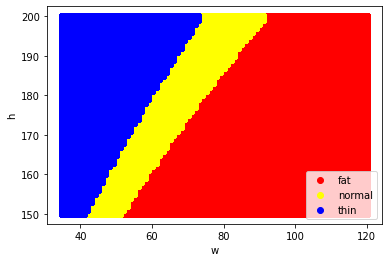

In [ ]:
import matplotlib.pyplot as plt

tbl2 = pd.read_csv('bmi.csv', index_col=2)
print(tbl2.head(3))
print()

def scatter_func(lbl, color):
  b = tbl2.loc[lbl]
  plt.scatter(b['weight'], b['height'], c=color, label=lbl)

scatter_func('fat','red')
scatter_func('normal','yellow')
scatter_func('thin','blue')
plt.xlabel('w')
plt.ylabel('h')
plt.legend()
plt.show()

<br>

# 랜덤포레스트 - 연속형 데이터에 대한 예측 Regression

`RandomForestRegressor()` : 회귀분석 모델 


<br>

# 🏡 집값 예측하기 - boston dataset



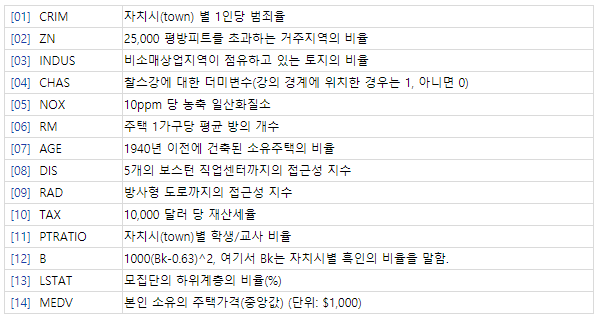

이미지출처 : http://dator.co.kr/?vid=ctg258&mid=textyle&document_srl=1721307  

In [ ]:
import pandas as pd
from sklearn.datasets import load_boston
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
boston = load_boston()
print(boston.keys())
print(boston.DESCR)

dfx = pd.DataFrame(boston.data, columns=boston.feature_names)
dfy = pd.DataFrame(boston.target, columns=['MEDV'])
df = pd.concat([dfx, dfy], axis=1)
print(df.head(3))

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])
.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX

<br>

## 상관관계 시각화  



In [ ]:
print(df.corr())

             CRIM        ZN     INDUS  ...         B     LSTAT      MEDV
CRIM     1.000000 -0.200469  0.406583  ... -0.385064  0.455621 -0.388305
ZN      -0.200469  1.000000 -0.533828  ...  0.175520 -0.412995  0.360445
INDUS    0.406583 -0.533828  1.000000  ... -0.356977  0.603800 -0.483725
CHAS    -0.055892 -0.042697  0.062938  ...  0.048788 -0.053929  0.175260
NOX      0.420972 -0.516604  0.763651  ... -0.380051  0.590879 -0.427321
RM      -0.219247  0.311991 -0.391676  ...  0.128069 -0.613808  0.695360
AGE      0.352734 -0.569537  0.644779  ... -0.273534  0.602339 -0.376955
DIS     -0.379670  0.664408 -0.708027  ...  0.291512 -0.496996  0.249929
RAD      0.625505 -0.311948  0.595129  ... -0.444413  0.488676 -0.381626
TAX      0.582764 -0.314563  0.720760  ... -0.441808  0.543993 -0.468536
PTRATIO  0.289946 -0.391679  0.383248  ... -0.177383  0.374044 -0.507787
B       -0.385064  0.175520 -0.356977  ...  1.000000 -0.366087  0.333461
LSTAT    0.455621 -0.412995  0.603800  ... -0.36608

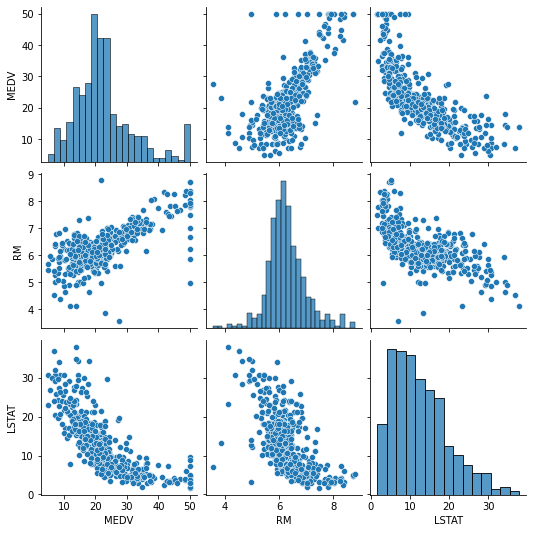

In [ ]:
cols = ['MEDV','RM','LSTAT']  #상관관계가 강한 변수로 시각화
sns.pairplot(df[cols])
plt.show()

<br>

## 데이터 준비 

충족조건은 생략하도록 한다.  


In [ ]:
x = df[['LSTAT']].values  #2차원 데이터로
y = df['MEDV'].values
print(x[:3])
print(y[:3])

[[4.98]
 [9.14]
 [4.03]]
[24.  21.6 34.7]


<br>

## 모델 작성

<br>

### 1. `DecisionTreeRegressor()` 


In [ ]:
model = DecisionTreeRegressor(max_depth=3, criterion='mse', random_state=123).fit(x, y)

print('predict:', model.predict(x)[:5])
print('real:', y[:5])

r2 = r2_score(y, model.predict(x))
print('결정계수(설명력):', r2)

predict: [30.47142857 25.84701493 37.315625   43.98888889 30.47142857]
real: [24.  21.6 34.7 33.4 36.2]
결정계수(설명력): 0.6993833085636556



회귀모델이므로 criterion='mse'를 사용한다. 



<br>

### 2. `RandomForestRegressor()`


In [ ]:
model = RandomForestRegressor(n_estimators=100, criterion='mse', random_state=123).fit(x, y)

print('predict:', model.predict(x)[:5])
print('real:', y[:5])

r2 = r2_score(y, model.predict(x))
print('결정계수(설명력):', r2)

predict: [24.469      21.975      35.48173333 38.808      32.11911667]
real: [24.  21.6 34.7 33.4 36.2]
결정계수(설명력): 0.9081654854048482



모델의 설명력이 0.90816로 매우 높은 수치이다. 과적합이 의심되므로 데이터셋을 분리하여 학습한다.  




<br>

## 데이터 분리하여 모델 작성하기  


In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=123)
model.fit(x_train, y_train)

print('predict:', model.predict(x_test)[:5])
print('real:', y_test[:5])

r2 = r2_score(y_test, model.predict(x_test))
print('결정계수(설명력):', r2)

predict: [23.34       24.94875    47.99933333 19.022      37.82591667]
real: [15.  26.6 45.4 20.8 34.9]
결정계수(설명력): 0.5805382105034671



회귀분석의 경우 절대적이진 않지만 모델의 설명력에 많이 의지하는 경우가 있다.    
0.58053의 설명력을 가지므로 꽤 합리적인 편이라고 할 수 있다. 


<br>

## 시각화 


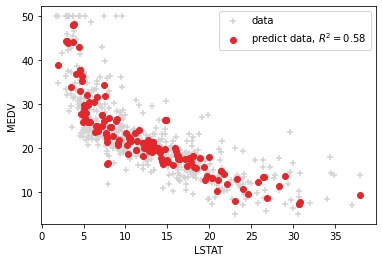

In [ ]:
plt.scatter(x, y, c='lightgray', marker='+', label='data')
plt.scatter(x_test, model.predict(x_test), c='#e3272b', marker='o', label='predict data, $R^2=%.2f$'%r2)
plt.xlabel('LSTAT')
plt.ylabel('MEDV')
plt.legend()
plt.show()

<br>

## 새로운 값으로 예측하기 



In [ ]:
import numpy as np
print(x_test[:3])

x_new = np.array([[80.1],[50],[5]])
print('예상 집값:', model.predict(x_new))

[[10.11]
 [ 6.53]
 [ 3.76]]
예상 집값: [ 9.404  9.404 26.139]
